# HH

## imports

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls drive/My\ Drive

'Colab Notebooks'	     MatlabResults
 Figures		     Models
 HH_ag.csv		     para_comb_20p_sample.csv
 HH_paramter_space_40s.csv   PR_ag.csv
 HH_voltage_40s.csv	     voltages_AP_30sek_sample.csv


In [0]:
import pandas as pd
import numpy as np
import os

In [0]:
%%time
HHss_df = pd.read_csv("drive/My Drive/HH_paramter_space_40s.csv",index_col=0,engine='python')
print(HHss_df.shape)
print(HHss_df.size)
names = ['gbar_Na','gbar_L','E_L','Cm','gbar_K','E_Na','E_K']
HHss_df.columns = names

(2187, 7)
15309
CPU times: user 107 ms, sys: 26.6 ms, total: 133 ms
Wall time: 691 ms


In [0]:
corr = HHss_df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,gbar_Na,gbar_L,E_L,Cm,gbar_K,E_Na,E_K
gbar_Na,1,-0.0269945,0.00790926,0.00496937,-0.0320991,-0.024929,0.00617281
gbar_L,-0.0269945,1,0.00548975,-0.00360274,0.00885626,0.00744187,-0.00970402
E_L,0.00790926,0.00548975,1,-0.0451501,0.0169272,-0.0178527,-0.00472383
Cm,0.00496937,-0.00360274,-0.0451501,1,0.0208975,-0.000480441,0.0154113
gbar_K,-0.0320991,0.00885626,0.0169272,0.0208975,1,-0.00045031,0.00193303
E_Na,-0.024929,0.00744187,-0.0178527,-0.000480441,-0.00045031,1,0.0293747
E_K,0.00617281,-0.00970402,-0.00472383,0.0154113,0.00193303,0.0293747,1


In [0]:
%%time
HHv_df = pd.read_csv("drive/My Drive/HH_voltage_40s.csv",index_col=0,engine='python')
HHv_df = HHv_df[HHv_df.columns[:1201]]
print(HHv_df.shape)
print(HHv_df.size)

(2187, 1201)
2626587
CPU times: user 3.25 s, sys: 376 ms, total: 3.63 s
Wall time: 5.11 s


In [0]:
HHss_df.describe()

,gbar_Na,gbar_L,E_L,Cm,gbar_K,E_Na,E_K
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,119.999812,0.300000,-54.399868,1.000001,36.000011,50.000058,-77.000241
std,13.859568,0.034648,6.283135,0.115497,4.157874,5.774797,8.893226
min,96.008101,0.240041,-65.277294,0.800180,28.801198,40.006009,-92.392450
25%,108.009501,0.270010,-59.840620,0.900065,32.401137,45.002375,-84.697100
50%,119.999996,0.300013,-54.400964,1.000036,36.000697,49.996375,-76.997887
75%,131.997179,0.329996,-48.959416,1.099977,39.597244,54.997873,-69.304729
max,143.985585,0.359957,-43.529069,1.199897,43.198358,59.991873,-61.603495


In [0]:
names = list(HHss_df.columns)
HHv = HHv_df.values
HHss = HHss_df.values

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mn
from sklearn.metrics import r2_score,mean_squared_error
import plotly

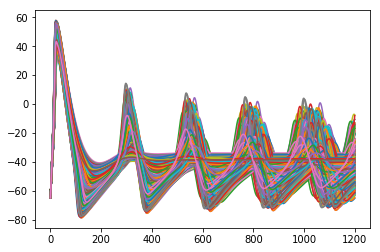

In [0]:
plt.plot(HHv[:10000,:].T);

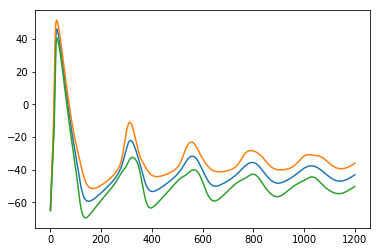

In [0]:
plt.plot(np.mean(HHv,axis=0))
plt.plot(np.mean(HHv,axis=0) + np.std(HHv,axis=0))
plt.plot(np.mean(HHv,axis=0) - np.std(HHv,axis=0))

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [0]:
import keras
from keras import Sequential
from keras.layers import SimpleRNN
from keras import models
from keras import layers

from copy import copy

Using TensorFlow backend.


In [0]:
def sonames(names):
  all_names = copy(names)
  for i,name in enumerate(names):
    all_names.extend([name0+'^2' if name0=='Cm' else name+'*'+name0 for name0 in names[i:]])
  return all_names
    

In [0]:
names = list(HHss_df.columns)
snames = sonames(names)
print(np.shape(snames))

pl = PolynomialFeatures(degree=2,include_bias=False)
HHss2 = pl.fit_transform(HHss)
print(HHss2.shape)

(35,)
(2187, 35)


In [0]:
df = pd.DataFrame(HHss2)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

In [0]:
maineff = copy(HHss)

maineff = np.concatenate([np.ones(shape=(maineff.shape[0],1)),maineff],axis=1)

crosseff = HHss2[:,HHss.shape[1]:]
Bmain_cross=np.dot(np.linalg.pinv(maineff),crosseff);
D=crosseff-np.dot(maineff,Bmain_cross);
#Model: Z=maineff*Bmain_cross+D
HHss2 = np.concatenate([maineff[:,1:],D],axis=1)

In [0]:
df = pd.DataFrame(HHss2)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

## Standardize and scale

In [0]:
X_Train, X_test, y_Train, y_test = train_test_split(HHss,HHv,test_size=0.3,random_state=111)

In [0]:
X_Train, X_test, y_Train, y_test = train_test_split(HHss,HHv,test_size=0.3,random_state=111)
scx = StandardScaler()
scy = StandardScaler()


X_Train = scx.fit_transform(X_Train)
y_Train = scy.fit_transform(y_Train)

X_test = scx.transform(X_test)
y_test = scy.transform(y_test)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_Train,y_Train,test_size=0.2,random_state=1234)

## Model training

In [0]:
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [0]:
model1 = models.Sequential()
model1.add(layers.Dense(28, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(layers.Dense(28, activation='relu'))
model1.add(layers.Dense(y_train.shape[1]))
model1.compile(optimizer='adam', loss='mse', metrics=[r_square])

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 28)                224       
_________________________________________________________________
dense_11 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_12 (Dense)             (None, 1201)              34829     
Total params: 35,865
Trainable params: 35,865
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
#plot_model(model1, to_file="drive/My Drive/Figures/models/HHclasical_arch.png", show_shapes=True, show_layer_names=True)

In [0]:
%%time
history1 = model1.fit(X_Train, y_Train,
                  epochs=10000,
                  batch_size=128,
                  verbose=0,
                  validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
CPU times: user 22.5 s, sys: 2.61 s, total: 25.1 s
Wall time: 16.3 s


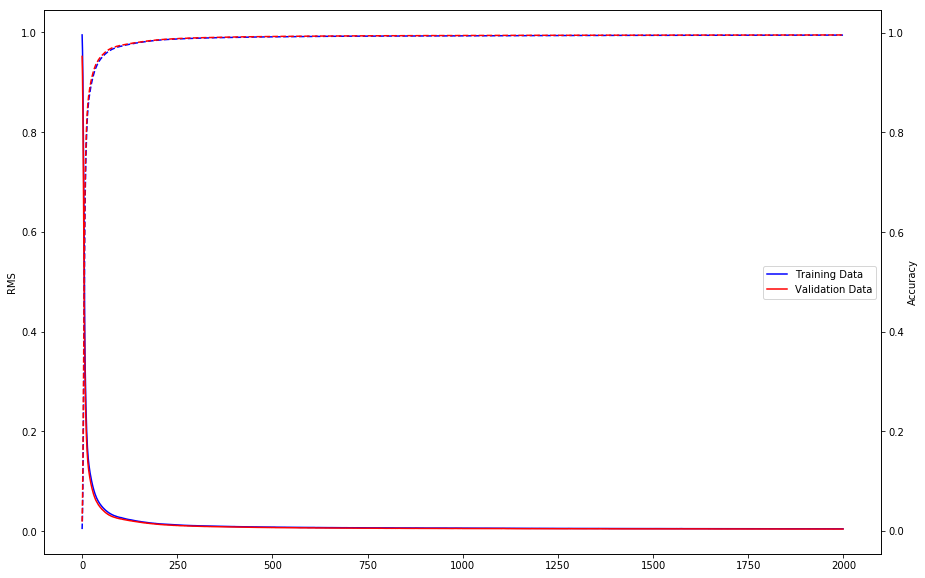

In [0]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(history1.history['loss'][:2000],label='Training Data',c='blue')
ax.plot(history1.history['val_loss'][:2000],label='Validation Data',c='red')
plt.ylabel('RMS')
plt.legend(loc='center right')

ax2 = ax.twinx()
ax2.plot(history1.history['r_square'][:2000],'--',c='blue')
ax2.plot(history1.history['val_r_square'][:2000],'--',c='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.savefig("drive/My Drive/Figures/R2plots/HH_training.png")

# model testing

In [0]:
X_Train, X_test, y_Train, y_test = train_test_split(HHss,HHv,test_size=0.3,random_state=111)
scx = StandardScaler()
scy = StandardScaler()


X_Train = scx.fit_transform(X_Train)
y_Train = scy.fit_transform(y_Train)

X_test = scx.transform(X_test)
y_test = scy.transform(y_test)

In [0]:
model2 = models.Sequential()
model2.add(layers.Dense(28, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(layers.Dense(28, activation='relu'))
model2.add(layers.Dense(y_train.shape[1]))
model2.compile(optimizer='adam', loss='mse', metrics=[r_square])

In [0]:
%%time
history2 = model2.fit(X_Train, y_Train,
                  epochs=1500,
                  batch_size=128,
                  verbose=0)
                  validation_data=(X_val, y_val))

CPU times: user 2min 20s, sys: 10.9 s, total: 2min 31s
Wall time: 1min 39s


In [0]:
ypred2 = model2.predict(X_test)
print(r2_score(y_test,ypred2))

0.993465893547006


## Permuted feature importance

In [0]:
from scipy.signal import find_peaks
from scipy.signal import peak_widths


def aggregated_features(X,aplimit=-20):
  action_potentials = []
  ap_amps = []
  widths = []
  widths_plotting = []

  for x in X:
    peaks,d = find_peaks(x, height=aplimit)
    if len(peaks)>0:
      ap_amps.append(d['peak_heights'])
    else:
      ap_amps.append(np.array([]))

    results_half = peak_widths(x, peaks, rel_height=0.5)
    widths.append(results_half[0])  # widths
    widths_plotting.append(results_half[1:])
    
    
    action_potentials.append(peaks)
  return np.array(action_potentials),np.array(ap_amps),np.array(widths),np.array(widths_plotting)

In [0]:
import seaborn as sns
def PFI_plotter_same(PFI,names,ap_times,save=False,filename=None):

  first_aptime = np.array([prap[0] if len(prap)>0 else np.nan for prap in ap_times])*0.025
  second_aptime = np.array([prap[1] if len(prap)>1 else np.nan for prap in ap_times])*0.025
  third_aptime = np.array([prap[2] if len(prap)>2 else np.nan for prap in ap_times])*0.025
  
  
  colors = sns.color_palette("Paired", len(names))

  fig = plt.figure(figsize=(15,10))
  ax = fig.add_subplot(111)
  ax.set_prop_cycle('color', colors)
  
  x_array = [f*0.025 for f in range(PFI.shape[2])]
  #plt.hist(first_aptime, weights=np.ones_like(first_aptime),bins=60,alpha=0.3)
  #plt.hist(second_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.3)
  #plt.hist(third_aptime, weights=np.ones_like(third_aptime),bins=60,alpha=0.3)
  
  
  for i in range(PFI.shape[1]):
    
    color = next(ax._get_lines.prop_cycler)['color']


    # Calculate min and max values of PFI for each variable
    sen_max = np.max(PFI[:,i,:],axis=0)
    sen_min = np.min(PFI[:,i,:],axis=0)
    plt.fill_between(x_array,sen_max,sen_min,facecolor=color,alpha=0.2) ;



    # Calculate mean and std values of PFI for each variable
    mu = np.mean(PFI[:,i,:],axis=0)
    std = np.std(PFI[:,i,:],axis=0)
    
    upper = mu+std
    lower = mu-std

    plt.fill_between(x_array,lower,upper,facecolor=color,alpha=0.5);


    plt.plot(x_array,mu,c=color,linewidth=2,label=names[i]);
    plt.ylim((np.min(PFI)-0.5,np.max(PFI)+0.5))
    

    
    


    plt.legend()
  
  if save:
    if filename:
      plt.savefig("drive/My Drive/Figures/"+filename)
    else:
      print("enter filename")


In [0]:
def PFI_plotter(PFI,names,ap_times,save=False,filename='None'):

  plt.figure(figsize=(15,160))
  #first_aptime = np.array([prap[0] if len(prap)>0 else np.nan for prap in ap_times])*0.025
  #second_aptime = np.array([prap[1] if len(prap)>1 else np.nan for prap in ap_times])*0.025
  #third_aptime = np.array([prap[2] if len(prap)>2 else np.nan for prap in ap_times])*0.025
  

  x_array = [f*0.025 for f in range(PFI.shape[2])]
  for i in range(PFI.shape[1]):
    

    plt.subplot(PFI.shape[1],1,i+1);

    # Calculate min and max values of PFI for each variable
    sen_max = np.max(PFI[:,i,:],axis=0)
    sen_min = np.min(PFI[:,i,:],axis=0)
    plt.fill_between(x_array,sen_max,sen_min) ;



    # Calculate mean and std values of PFI for each variable
    mu = np.mean(PFI[:,i,:],axis=0)
    std = np.std(PFI[:,i,:],axis=0)
    
    upper = mu+std
    lower = mu-std

    plt.fill_between(x_array,lower,upper,facecolor='lightblue',label=names[i]) ;


    plt.plot(x_array,mu,c='r',linewidth=1);
    plt.ylim((np.min(PFI)-0.5,np.max(PFI)+0.5))
    #plt.hist(first_aptime, weights=np.ones_like(first_aptime),bins=60,alpha=0.2)
    #plt.hist(second_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.2)
    #plt.hist(third_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.2)
    
    
    


    plt.legend(loc='right')
    
  if save:
    if filename:
      plt.savefig("drive/My Drive/Figures/"+filename)
    else:
      print("enter filename")

In [0]:
from copy import copy

def Permuted_feature_impotance(_X,y,model,seeds=[234]):
  
  base_yhat = model.predict(_X) # baseline predictions
  base_line = np.array(
      [mean_squared_error(y[:,c],base_yhat[:,c]) #Baseline error
       for c in range(base_yhat.shape[1])])
  
  PFI = np.zeros((len(seeds),_X.shape[1],y.shape[1])) # Empty array for importances
  
  for i,seed in enumerate(seeds):
    
    np.random.RandomState(seed) # Sets the random state for numpy
    for j in range(X_test.shape[1]): # Iterate over columns
      
      X = copy(_X)
      X[:,j] = np.random.permutation(X[:,j]) # Permute one column

      perm_yhat = model.predict(X)
      


      # Permuted Error
      FI_perm = np.array([mean_squared_error(y[:,c],perm_yhat[:,c]) for c in range(perm_yhat.shape[1])]) 
      PFI[i,j,:] = FI_perm - base_line # Feature importance
  
  return PFI


In [0]:
ap_times,amp,w,wp = aggregated_features(scy.inverse_transform(y_test)) # Calculate aggreagated features (not needed)

In [0]:
%%time
seeds = [123*i for i in range(1,4)]
PFI = Permuted_feature_impotance(X_test,y_test,model2,seeds)

CPU times: user 9.16 s, sys: 17.7 ms, total: 9.17 s
Wall time: 9.09 s


In [0]:
PFI.shape

(3, 7, 1201)

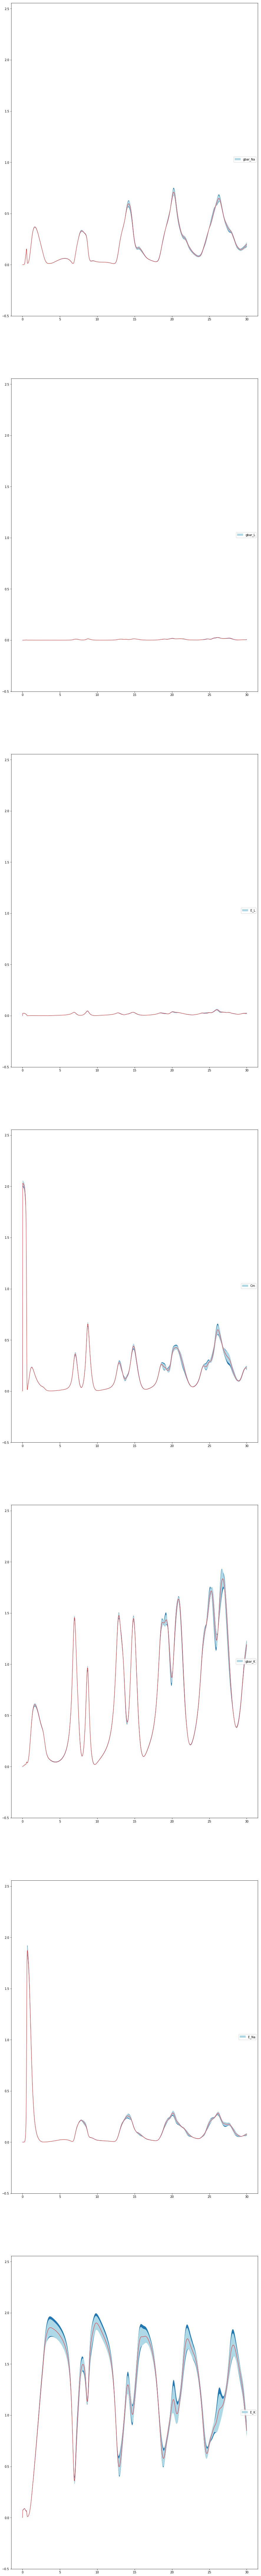

In [0]:
PFI_plotter(PFI,names,ap_times)

Text(0, 0.5, 'Feature Importance')

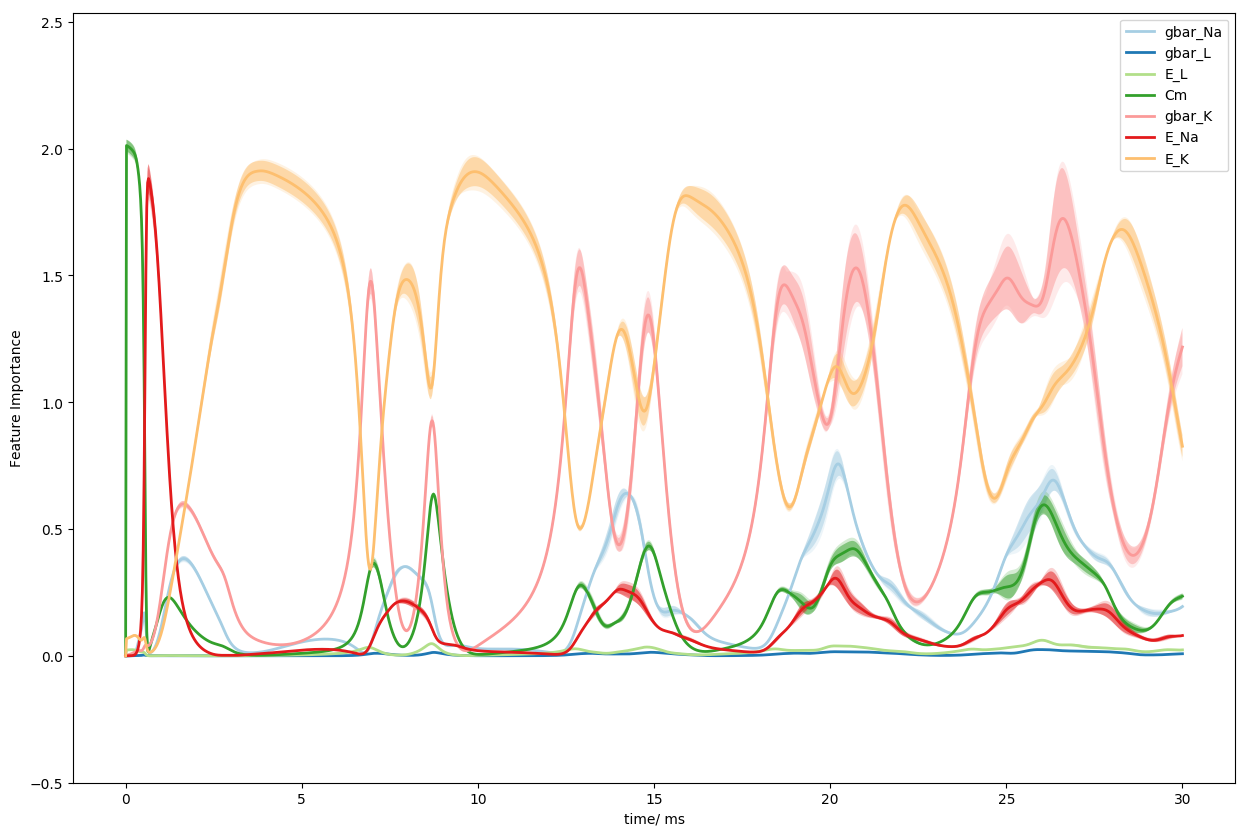

In [0]:
plt.style.use('default')
PFI_plotter_same(PFI,names,ap_times)
plt.xlabel('time/ ms')
plt.ylabel('Feature Importance')
#plt.savefig("drive/My Drive/Figures/HH_PFI.png")

In [0]:
PFI[:,:,:301].shape

(3, 7, 301)

In [0]:
mu0 = np.array([-65.0,-61.22871110301428,-57.518730355109625,-53.86495115120076,-50.26059676726204,-46.695274711242675,-43.15220656467099,-39.60434812105551,-36.00929477684393,-32.30316208682385,-28.39416765932718,-24.157653028633607,-19.43637738549626,-14.053832032542703,-7.853178630014464,-0.7727070485886938,7.055935217123862,15.248875884344155,23.226350695481127,30.379344309608978,36.24743778805422,40.62007802019047,43.54278204161153,45.24849089687439,46.05131690355959,46.25009342402765,46.074727711981716,45.67667857223904,45.14451571764194,44.52547895356669,43.84310687945869,43.10868522561388,42.327709386881445,41.50319245701009,40.63723196338144,39.73169732642057,38.78850108050697,37.80968345682422,36.79741803363734,35.753987088002084,34.68174772042035,33.583097496128076,32.46044311770032,31.31617323993654,30.15263552730979,28.97211780200829,27.776832836310007,26.568906419932322,25.350368382105916,24.123146060753196,22.88905995480426,21.649821209961313,20.40703070133681,19.162179376440083,17.916649746868522,16.671718184396713,15.42855801078553,14.18824309025581,12.951751864670474,11.719971696966425,10.49370343669342,9.273666115249613,8.060501683800608,6.85477977038346,5.657002345217837,4.467608305457199,3.2869778962358094,2.115436944139963,0.9532608787661075,-0.1993214960521727,-1.3421245185330921,-2.4750024932316985,-3.5978468456376858,-4.710583634084292,-5.813171464303189,-6.905599794917457,-7.987887693529595,-9.060083033586036,-10.12226217682028,-11.174530119304173,-12.21702113479009,-13.249899905376246,-14.273363145598678,-15.287641681768646,-16.29300293032758,-17.289753790261962,-18.278243904675374,-19.258869105810177,-20.232075037718847,-21.198360793805087,-22.15828235748087,-23.112455651415566,-24.06155887864946,-25.006333766064483,-25.947585155352396,-26.886178234710663,-27.823032529559494,-28.759111572861375,-29.695406900963956,-30.63291485175663,-31.572604626575487,-32.51537630090019,-33.46200810581851,-34.413093535948725,-35.36897071220377,-36.32964866894162,-37.29473772987326,-38.26339240906305,-39.234275888305774,-40.205553004652685,-41.17491579892416,-42.13964114877441,-43.096676689193885,-44.04274777055359,-44.974476684482774,-45.88850433037537,-46.78160445704002,-47.65078056279233,-48.493336786574716,-49.30691847599032,-50.089523794292944,-50.8394936942641,-51.55549070212847,-52.236476938052384,-52.88169833906849,-53.49067700917813,-54.063209092709656,-54.59936313289331,-55.099473931668385,-55.56412856503636,-55.99414383994237,-56.39053643433579,-56.75448838401839,-57.08731076727821,-57.390407994665466,-57.66524457012728,-57.91331528281396,-58.1361193855253,-58.335138904237816,-58.51182101073176,-58.667564317611905,-58.803708733181686,-58.92152856303721,-59.02222836450673,-59.106941154075905,-59.17672848144451,-59.232581939549185,-59.27542575161066,-59.30612006479453,-59.32546465999648,-59.33420291458673,-59.33302578274864,-59.32257571145379,-59.30345034752449,-59.2762060420359,-59.24136109159684,-59.19939873053291,-59.15076984126299,-59.09589543592937,-59.03516890648392,-58.9689580587943,-58.897606971502626,-58.82143769105267,-58.7407517687765,-58.655831669723995,-58.56694207056114,-58.47433105261454,-58.378231193423,-58.27886057886689,-58.17642374130226,-58.071112531012645,-57.963106915341925,-57.85257572905585,-57.73967736248776,-57.62456041153236,-57.50736427500329,-57.38821971607496,-57.26724937540588,-57.144568258560426,-57.02028418407504,-56.89449820346479,-56.767304988425124,-56.638793193815204,-56.5090457955978,-56.378140402085975,-56.24614954473289,-56.113140948682386,-55.97917777879764,-55.84431887715831,-55.70861897138258,-55.57212887713709,-55.43489567917054,-55.2969628999715,-55.158370655878784,-55.0191557994038,-54.87935205181207,-54.73899012279295,-54.5980978216376,-54.45670015688343,-54.31481942975682,-54.17247531756108,-54.029684949836934,-53.886462975642985,-53.742821628299524,-53.598770778279466,-53.45431798578852,-53.309468541243945,-53.16422550765617,-53.01858975042015,-52.87255996836178,-52.72613271716665,-52.579302428522944,-52.43206142477212,-52.28439993104389,-52.13630608089788,-51.98776591814743,-51.838763396330805,-51.6892803702025,-51.539296585964,-51.38878966711936,-51.23773509167762,-51.086106169858695,-50.933874012382276,-50.7810074938631,-50.627473213743976,-50.4732354458222,-50.31825608549442,-50.162494586122506,-50.005907891210775,-49.8484503610653,-49.69007367969911,-49.53072676407943,-49.37035565389067,-49.20890339935693,-49.04630992455673,-48.88251188931029,-48.71744253773735,-48.551031514085224,-48.383204678170344,-48.21388390419704,-48.04298684909741,-47.87042669841719,-47.69611189643382,-47.51994585043228,-47.34182659153056,-47.16164642332069,-46.97929153905192,-46.79464156942924,-46.60756913226592,-46.41793931324396,-46.225609091175244,-46.030426745841645,-45.832231164374406,-45.63085112454779,-45.42610448131066,-45.21779730714692,-45.00572293171424,-44.789660922967,-44.56937594563122,-44.344616584284424,-44.11511401137037,-43.88058060180459,-43.64070845924841,-43.395167838813116,-43.14360549717993,-42.8856430337677,-42.620875167537484,-42.34886808816683,-42.06915789589533,-41.78124926073589,-41.484614389978645,-41.178692537127844,-40.86289020787602,-40.536582418264175,-40.199115337660245,-39.849810707764256,-39.487972614979974,-39.11289714887455,-38.723885568180854,-38.3202615265172,-37.901392908454575,-37.466718460690494,-37.0157792107722,-36.5482540281914,-36.063997925315505,-35.563080955420965,-35.04582461536305,-34.51283213411376,-33.96500901838937,-33.40357132906613,-32.83004090313164,-32.246229026804585,-31.654211853024165,-31.056301370531354,-30.455015394052296,-29.85304902164233,-29.253249041783384,-28.658591569667028,-28.0721615572798,-27.497130931865687,-26.93673060551776,-26.394211853384125,-25.872795016196324,-25.37560744103078,-24.905616381569597,-24.46556454226526,-24.057915384375,-23.684812842362046,-23.348056866082214,-23.049093477582595,-22.789016512088555,-22.568577644743176,-22.388201780056413,-22.248005647071285,-22.147818424967227,-22.087203939147678,-22.065484346768102,-22.081765273142366,-22.13496223053722,-22.22382791885941,-22.34697987335471,-22.50292780283942,-22.690100035528147,-22.906868518192912,-23.151571967461827,-23.422536844290942,-23.718095976292382,-24.036604758870517,-24.376454975436594,-24.73608633855407,-25.113995914125884,-25.508745677091657,-25.918968395534797,-26.34337206589452,-26.7807431385934,-27.229948688518338,-27.689937689379615,-28.15974153926959,-28.638473944205355,-29.12533018266942,-29.61958585036692,-30.120595054488053,-30.62778807730651,-31.140668453638416,-31.65880939856212,-32.18184950086562,-32.709487554472155,-33.24147642474469,-33.7776157574435,-34.3177434154509,-34.861725471773624,-35.40944465314196,-35.96078719820741,-36.51562820341381,-37.07381556452423,-37.63515299494664,-38.199382620083156,-38.766167950577184,-39.33507815622905,-39.90557469945947,-40.47700119324451,-41.048577270745824,-41.619396822826985,-42.18843069460029,-42.754533604463866,-43.31645486175191,-43.87285260627792,-44.42231111849726,-44.963360924140424,-45.494501371161476,-46.014225227735075,-46.52104497016191,-47.01352020579562,-47.49028559428935,-47.95007856060138,-48.391765808536114,-48.81436730147944,-49.21707615115728,-49.59927280012308,-49.9605320900939,-50.300622517577,-50.61949778307842,-50.9172817994769,-51.19424888824811,-51.45080136954031,-51.68744658608614,-51.904775010429155,-52.10344055065621,-52.28414345973458,-52.44761592915938,-52.59461007138338,-52.72588787995279,-52.84221284858658,-52.94434294539141,-53.0330247367732,-53.10898850867698,-53.17294430808896,-53.225578794097025,-53.267552861076446,-53.29949994697878,-53.32202493140679,-53.33570355988704,-53.34108230686103,-53.33867858582499,-53.32898126343526,-53.3124513895821,-53.28952309643791,-53.260604614927665,-53.22607938521555,-53.1863072013276,-53.141625384789066,-53.09234995980082,-53.038776818663266,-52.98118285790497,-52.9198270822844,-52.8549516728154,-52.78678300328436,-52.715532619000264,-52.64139815692357,-52.56456422784605,-52.48520324248368,-52.40347619189058,-52.31953338666743,-52.233515138036715,-52.14555240395427,-52.055767388023206,-51.96427410216384,-51.87117888554931,-51.77658088704095,-51.68057251896676,-51.583239869818264,-51.48466308929089,-51.38491675026153,-51.28407017401539,-51.18218773754965,-51.07932915616745,-50.97554974364919,-50.87090065221483,-50.765429093108416,-50.65917854535231,-50.55218893953736,-50.444496838611265,-50.33613559115607,-50.2271354830338,-50.117523874865505,-50.007325325721816,-49.896561708232674,-49.7852523158131,-49.673413959204,-49.56106105739304,-49.448205715689156,-49.33485779977981,-49.221025007072825,-49.10671292389258,-48.99192507785754,-48.8766629938575,-48.760926226024885,-48.64471240363201,-48.52801725567507,-48.41083464079612,-48.29315656524621,-48.17497320047167,-48.056272887997316,-47.93704214662297,-47.817265670544664,-47.696926321290945,-47.57600511588041,-47.45448120484121,-47.33233185089942,-47.20953239492665,-47.08605621661627,-46.96187469398602,-46.83695714272804,-46.711270766839895,-46.584780581067115,-46.4574493431629,-46.32923746636522,-46.200102925749334,-46.07000115747818,-45.93888494829317,-45.80670431870461,-45.67340639019277,-45.53893524960147,-45.40323180416668,-45.26623362202684,-45.12787477562079,-44.98808569893557,-44.84679289494942,-44.703919001871164,-44.55938241103133,-44.41309719486579,-44.26497295681707,-44.11491470599115,-43.96282277190029,-43.808592760200604,-43.65211556053386,-43.49327745198149,-43.33196028953514,-43.16804181334014,-43.001396114571975,-42.83189427150168,-42.65940520028275,-42.48379673110358,-42.30493695597765,-42.122695851801595,-41.93694720143435,-41.74757080056982,-41.554454954911726,-41.357499184236666,-41.15661714840861,-40.9517396584902,-40.74281773544609,-40.52982559877251,-40.31276353715346,-40.09166055659364,-39.86657680195546,-39.637605728563045,-39.40487603340123,-39.168553386088654,-38.92884202044164,-38.68598622113102,-38.44027165385124,-38.19202646838503,-37.94162195901386,-37.68947242887123,-37.436033855934234,-37.18180097743523,-36.92730252896158,-36.67309477950301,-36.419753814917186,-36.16786722261863,-35.9180259705605,-35.67081705762436,-35.426817308557,-35.18658839902152,-34.95067312906484,-34.71959280840858,-34.493845594964505,-34.27390569854811,-34.0602233038191,-33.85322530467897,-33.65331694466049,-33.460884552866666,-33.27629947086508,-33.09992298121646,-32.932111804474964,-32.773223478758425,-32.623620842264245,-32.48367481245639,-32.353764945496884,-32.23427738246563,-32.125600183630596,-32.02811629441822,-31.94219472724674,-31.86818080966579,-31.8063864611914,-31.757081590219983,-31.72048743968769,-31.696772445632327,-31.68605079758775,-31.688383560843302,-31.703781969808237,-31.73221236163885,-31.77360215069881,-31.827846306211878,-31.894813701378858,-31.974352935041676,-32.066297155666255,-32.17046773222948,-32.28667665348685,-32.41472775599442,-32.55441696837067,-32.70553181470515,-32.867850426029065,-33.04114033407854,-33.22515720641808,-33.41964369631484,-33.624328501308185,-33.838925653890485,-34.06313409486338,-34.29663749752299,-34.53910428897818,-34.790187832931444,-35.049526710724294,-35.31674503422659,-35.59145279477185,-35.87324614150845,-36.16170763255532,-36.45640645334575,-36.75689863833855,-37.06272733975218,-37.373423292947756,-37.688505581296674,-38.00748288625647,-38.32985534583091,-38.65511712942153,-38.98275973819177,-39.3122758489194,-39.64316339188138,-39.97492946175327,-40.30709359034818,-40.639190072616366,-40.97076920725474,-41.301397536942254,-41.63065737404951,-41.95814590859575,-42.28347421595902,-42.606266200015014,-42.92615735401006,-43.24279295185096,-43.55582527982263,-43.86490972179099,-44.169699830740534,-44.46984204782016,-44.76497115045047,-45.05470762590679,-45.33865816211337,-45.61641982598115,-45.88758792513175,-46.151766602584594,-46.4085805272247,-46.657685662907426,-46.89877728085217,-47.131594053853604,-47.355918148443195,-47.571571946706065,-47.77841275875892,-47.976326814228635,-48.16522372121941,-48.34503210178331,-48.51569674038433,-48.67717729723484,-48.829448441510316,-48.97250111229655,-49.106344580257925,-49.23100892888247,-49.34654760457039,-49.453039630265835,-49.55059118017389,-49.63933623640702,-49.71943623107641,-49.791078633665244,-49.854474629609804,-49.90985607213271,-49.95747198857688,-49.9975848808208,-50.03046707803612,-50.05639730507458,-50.07565761529017,-50.088530730948534,-50.095297805158516,-50.096236601553535,-50.091620035609395,-50.08171502151383,-50.066781587721685,-50.047072179218674,-50.022831146761185,-49.9942943713711,-49.96168899559912,-49.92523327072704,-49.88513647447524,-49.84159891434046,-49.79481197857882,-49.744958238930266,-49.692211581175265,-49.63673737159191,-49.57869262031392,-49.51822617560477,-49.4554789113766,-49.390583928842936,-49.32366676521623,-49.25484560423774,-49.18423150464229,-49.1119286255007,-49.03803446493163,-48.96264010579922,-48.88583046177951,-48.80768452796014,-48.72827562930952,-48.647671674898994,-48.56593539467514,-48.48312458006104,-48.39929231264073,-48.31448718295311,-48.228753502082796,-48.14213150081583,-48.05465751353677,-47.966364159235454,-47.87728050000405,-47.787432195847956,-47.69684164043013,-47.60552809659899,-47.513507804500264,-47.420794093984405,-47.327397476742725,-47.23332573166087,-47.13858398233379,-47.04317475712123,-46.947098051866114,-46.85035137359068,-46.7529297815439,-46.65482591809394,-46.55603003570449,-46.45653001210556,-46.35631136171039,-46.255357248495926,-46.15364848414131,-46.05116353115504,-45.94787850395579,-45.843767164146456,-45.738800927515584,-45.632948870937604,-45.5261777484907,-45.41845201913314,-45.30973389191063,-45.199983385298836,-45.08915842301721,-44.977214957612155,-44.8641071293949,-44.74978747597389,-44.6342071943727,-44.51731646299992,-44.39906482758275,-44.27940166583756,-44.15827671884057,-44.035640702215346,-43.91144598369996,-43.785647330168224,-43.658202695602434,-43.529074049104615,-43.39822821385304,-43.26563767877826,-43.131281387488514,-42.99514543750215,-42.85722372208159,-42.717518420611526,-42.57604040420126,-42.432809475198816,-42.287854500650575,-42.14121340461212,-41.99293305905715,-41.84306908253516,-41.69168560097055,-41.53885501392592,-41.38465778542855,-41.229182332168044,-41.072525028118434,-40.91479031562498,-40.7560909940369,-40.596548642259265,-40.43629425567058,-40.275469092473855,-40.114225753018864,-39.952729424044634,-39.79115912982296,-39.62970877107495,-39.468587588360194,-39.30801980185977,-39.148243162165336,-38.98950639051833,-38.83206570854847,-38.676180869161264,-38.52211118083233,-38.370111962463305,-38.22043169632807,-38.07330990134316,-37.928975541123236,-37.787645797419174,-37.649525024204856,-37.514803943276405,-37.38365918027044,-37.25625328370824,-37.13273537561347,-37.01324238613399,-36.89790073404467,-36.786828199363626,-36.680135708874445,-36.577928755832986,-36.48030833932318,-36.38737141784126,-36.299210944273106,-36.21591573250683,-36.13757028662606,-36.06425476480663,-35.9960450996687,-35.93301321726709,-35.87522725859324,-35.82275175083379,-35.775647737276394,-35.73397293625256,-35.69778213846016,-35.66712798236227,-35.64206223251898,-35.62263757602769,-35.608909783319874,-35.600939968996485,-35.598796597577774,-35.60255677689959,-35.61230657170416,-35.62814003815766,-35.650156965380404,-35.67845940822215,-35.71314730841774,-35.754313632765246,-35.80203946628843,-35.85638952130671,-35.91740843434181,-35.985118086390294,-36.05951599430884,-36.140574797350915,-36.22824272798274,-36.322444923780964,-36.42308545184039,-36.530049805089135,-36.64320765169757,-36.76241560506841,-36.887519747823454,-37.01835773277565,-37.15476031761634,-37.296552317665785,-37.44355299301101,-37.59557593880835,-37.75242863917302,-37.913911780803936,-38.079818541826704,-38.24993398368906,-38.42403474206683,-38.60188912072654,-38.783257701775334,-38.967894469886836,-39.155548311657284,-39.34596472981241,-39.538887575437315,-39.734060607862276,-39.93122883085108,-40.130139503532114,-40.33054287675934,-40.532192653284035,-40.734846203154355,-40.93826458790345,-41.14221249915544,-41.346458209696834,-41.55077367275139,-41.75493486925681,-41.9587225128348,-42.161923047926244,-42.36432989180494,-42.565744715252606,-42.76597851554387,-42.96485220125304,-43.16219647415714,-43.35785091043642,-43.55166228337677,-43.74348231403353,-43.9331650735019,-44.120564306437714,-44.30553086070656,-44.48791042300394,-44.66754169043537,-44.84425512619605,-45.01787246835891,-45.188207192649344,-45.35506611876532,-45.518252263805444,-45.67756889629225,-45.832824605678795,-45.98383888781409,-46.130447700295555,-46.272508262404386,-46.40990245896679,-46.54253838712975,-46.67034982273238,-46.7932938599618,-46.91134717367124,-47.02450155780753,-47.132759369436606,-47.23612931310378,-47.33462284852167,-47.42825137481583,-47.517024184405564,-47.600947174932685,-47.680022336683585,-47.75424795206032,-47.82361943569757,-47.88813073724373,-47.947776131624416,-48.002552199627544,-48.052459806229166,-48.0975059307242,-48.13770519374653,-48.17308105510861,-48.20366664368022,-48.22950525864674,-48.2506505915854,-48.2671666562621,-48.279127500133924,-48.28661667962073,-48.28972652780463,-48.28855725802383,-48.283215934039134,-48.273815392281946,-48.26047315382121,-48.243310409059916,-48.22245110571797,-48.19802114496217,-48.1701476848622,-48.13895850452151,-48.104581405624955,-48.06714361459752,-48.02677115890371,-47.98358823397473,-47.937716566496945,-47.88927480644198,-47.838377991850095,-47.785137084563694,-47.729658614674385,-47.672044424202895,-47.61239149770158,-47.5507918654696,-47.487332560982864,-47.422095611943696,-47.35515805245128,-47.28659194368495,-47.216464402618904,-47.144837634441856,-47.07176897408555,-46.9973109372628,-46.92151128219232,-46.844413091860304,-46.76605486233831,-46.686470617297644,-46.60569003153135,-46.52373857691044,-46.440637676760815,-46.35640488894609,-46.27105409652397,-46.184595718223804,-46.09703694631258,-46.00838199505194,-45.91863238898225,-45.827787260099406,-45.735843687956,-45.64279706208992,-45.54864147725319,-45.45337015023067,-45.35697586895581,-45.25945144677708,-45.160790198092236,-45.06098640917593,-44.96003578993122,-44.85793591617889,-44.754686612246445,-44.65029031494651,-44.544752358372406,-44.438081225848194,-44.33028872596025,-44.22139013105982,-44.11140426217814,-44.00035352061775,-43.888263886285046,-43.77516485929995,-43.66108934015244,-43.546073457641526,-43.43015633261826,-43.31337979683621,-43.19578808797831,-43.077427555387146,-42.9583464223234,-42.83859463021304,-42.71822379434138,-42.597287261929125,-42.47584024355556,-42.35393995149932,-42.23164573696335,-42.10901915882991,-41.986124012986316,-41.863026373000466,-41.73979474959339,-41.61650040413246,-41.49321795974059,-41.37002623524478,-41.247009306415514,-41.12425763801746,-41.001869166049765,-40.879950141579556,-40.758615588450745,-40.63798924089602,-40.518202887312604,-40.39939506726304,-40.28170923570811,-40.16529152738653,-40.050288417295036,-39.936844605059946,-39.825101430569475,-39.71519594570843,-39.60726066274959,-39.501423703228326,-39.39780902929258,-39.296536424380555,-39.19772097646854,-39.10147208419293,-39.00789209713273,-38.917074882849604,-38.82910463782939,-38.74405524935122,-38.66199033714244,-38.58296402160925,-38.50702230338571,-38.43420489761979,-38.36454723158499,-38.298082427206516,-38.23484307926274,-38.17486267664818,-38.118176616033985,-38.06482272940208,-38.01484136449808,-37.96827504001177,-37.92516775211053,-37.88556405401766,-37.84950803891523,-37.817042346401855,-37.78820724352194,-37.76303975304196,-37.741572781104,-37.72383412609292,-37.70984531918528,-37.69962030283199,-37.69316403708844,-37.690471175079544,-37.691525020713854,-37.69629696404428,-37.7047465601342,-37.716822392732254,-37.73246373845389,-37.75160302951203,-37.77416894293419,-37.80008995942914,-37.82929807927165,-37.8617324017759,-37.89734225282181,-37.93608958926862,-37.977950488563515,-38.022915640717045,-38.07098983396828,-38.122190547318375,-38.17654577530377,-38.23409121400619,-38.29486697065505,-38.358913912459634,-38.42626982203713,-38.49696557406779,-38.57102152320423,-38.64844433763308,-38.729224445842895,-38.81333423163966,-38.900727050084626,-38.99133709940449,-39.08508012620694,-39.18185495826398,-39.281545728379605,-39.3840246051039,-39.489154758435284,-39.596793321774996,-39.70679410687041,-39.81900993145046,-39.93329457729894,-40.04950438222802,-40.167499551725,-40.28714517870468,-40.40831194651203,-40.530876433914926,-40.65472100329305,-40.7797332241249,-40.905804975082255,-41.03283135490775,-41.16070955797506,-41.28933788305031,-41.418614990631625,-41.54843944376332,-41.67870953227909,-41.809323348500016,-41.94017910051007,-42.07117555960944,-42.20221263596391,-42.333191979063216,-42.46401749632285,-42.59459570871764,-42.72483588758166,-42.85464994391826,-42.98395214150829,-43.11265870795945,-43.24068744254714,-43.367957424180474,-43.4943888462354,-43.61990302241636,-43.74442251730794,-43.86787132202078,-43.990174935353906,-44.11126021248863,-44.23105486222598,-44.3494865166169,-44.46648137744705,-44.58196254745039,-44.695848203860244,-44.80804988961794,-44.91847120389323,-45.027007150479456,-45.13354436636002,-45.23796226092282,-45.34013502036565,-45.439934313384924,-45.53723244357541,-45.63190569894048,-45.72383769515742,-45.81292245690435,-45.89906697541646,-45.98219301126284,-46.06223791221184,-46.13915439602306,-46.212909389047866,-46.28348217948229,-46.35086214124459,-46.415046333419184,-46.47603718866642,-46.53384038115049,-46.58846298972936,-46.639911951069,-46.688192818548465,-46.73330883152126,-46.77526033386434,-46.81404450483359,-46.84965545414212,-46.88208461707448,-46.911321417380755,-46.93735413668422,-46.96017090200806,-46.97976069392055,-46.996114312351736,-47.00922521778458,-47.01909022675801,-47.02571003372962,-47.02908956145985,-47.029238160762795,-47.026169696202494,-47.01990249495132,-47.010459252859086,-46.9978668728091,-46.982156297325034,-46.96336233448728,-46.94152349752283,-46.916681861393585,-46.88888292415744,-46.858175447121496,-46.82461126537218,-46.78824504420901,-46.74913395416347,-46.70733728040045,-46.66291594487434,-46.61593199135081,-46.566448034547165,-46.51452672067253,-46.46023022867183,-46.40361983521703,-46.34475557558713,-46.28369602286602,-46.22049817551017,-46.15521748759925,-46.087908016051614,-46.01862268974274,-45.94741367387674,-45.874332787561805,-45.799431944631216,-45.72276356584592,-45.64438092892657,-45.564338423230794,-45.48269170316849,-45.39949773637085,-45.314814781360155,-45.228702295020966,-45.141220819220074,-45.05243183527218,-44.96239761935814,-44.8711810552665,-44.778845433964506,-44.68545419697747,-44.591070624960935,-44.49575749056507,-44.399576675919214,-44.30258880551791,-44.20485294268267,-44.10642640439644,-44.00736471552598,-43.90772175231195,-43.807550047670134,-43.70690122590831,-43.60582648252186,-43.50437703137158,-43.40260442101207,-43.30056065116865,-43.19829806236581,-43.095869059189745])
std0 = np.array([0.0,0.4520353442690084,0.8899142255480436,1.3152089599069692,1.730257090105647,2.1390625977188247,2.5486763626251845,2.9711904387189567,3.4263576070575987,3.944613252848745,4.569788863091433,5.35967472404343,6.380045300775087,7.683361327626743,9.260487457131726,10.966837632695873,12.472716572215687,13.336230091672766,13.22490199574568,12.130550316503529,10.393835430037075,8.535450739731518,7.0182765877967945,6.055605179508522,5.57308979519067,5.366457042208183,5.274392148594778,5.218048571989178,5.168907507172896,5.119010165528467,5.067048168154311,5.013525693811664,4.9593615445532295,4.905531753791059,4.8529786650369,4.802579829004984,4.75512981722446,4.711326281679604,4.671759206680243,4.636903526168739,4.607115472790405,4.58263272142615,4.5635782811229735,4.549967803492039,4.541719820449508,4.538668253626801,4.5405763878912095,4.547151528488236,4.558059761092571,4.572939964299842,4.591416672927813,4.6131115469060155,4.637653126498271,4.664684674345667,4.693870470473094,4.724900334790654,4.757492818370615,4.79139706064831,4.8263936126534235,4.862294370810661,4.8989419140412185,4.936208328202104,4.973993659319448,5.0122241834075325,5.050850569813538,5.089846037897424,5.129204557876887,5.168939183040508,5.209080559522762,5.2496756518924474,5.290786713389021,5.332490540452233,5.374878041627451,5.418054139261167,5.46213802487373,5.5072637930228385,5.5535814747951,5.601258475716044,5.650481429242392,5.701458488269542,5.7544220446738965,5.809631873421891,5.867378668361112,5.927988000079572,5.991824658698189,6.059297289103078,6.130863246966817,6.207033715503488,6.2883787849530375,6.375532416990015,6.469197006276538,6.570147141440636,6.679231980181525,6.797375379501735,6.925572716313485,7.064882861418119,7.216413121106592,7.381294636976046,7.560644988121858,7.755514667936703,7.966814181880668,8.195220111170718,8.441061199862913,8.704190324578157,8.983854628776623,9.278582305313938,9.586108620931634,9.903362783987712,10.226529909512303,10.551189376663554,10.872516277972432,11.185521407292157,11.48530167803767,11.76727508624842,12.027382130193276,12.262243341576113,12.469268635439448,12.646714051837087,12.793680828936575,12.910054145799208,12.996388567837617,13.053757892903592,13.08359388107434,13.087539181577105,13.067332941147233,13.0247368416214,12.961498157767466,12.879338977608203,12.779958462512058,12.665036985493547,12.536235731750308,12.395189580411103,12.243494764512668,12.082694052427724,11.914262363846797,11.739594622454813,11.559996724447512,11.376679568395064,11.190755727220756,11.003238256754758,10.815041245402323,10.626981742259371,10.439782829137823,10.254077639320618,10.070414153917154,9.889260540596752,9.71101091347098,9.535991279339019,9.364465636125786,9.196642014975465,9.032678356530187,8.872688170296447,8.71674588766212,8.564891888572586,8.417137120966107,8.27346733570031,8.133846905267868,7.998222273743804,7.866525014731212,7.738674557698921,7.61458059643182,7.494145190288131,7.3772646032986735,7.263830917449503,7.153733435533918,7.046859883140299,6.943097448000078,6.842333675602529,6.744457226774495,6.649358515273711,6.556930232410288,6.467067789305994,6.379669668571806,6.294637704022356,6.21187728360071,6.1312975016976194,6.0528112586536125,5.9763353168595446,5.9017903130079405,5.8291007388047715,5.75819489142457,5.689004805468044,5.621466157093348,5.555518154235613,5.491103415536673,5.428167836542692,5.36666044685588,5.306533268732979,5.247741159236972,5.190241663721881,5.133994857270641,5.078963194345458,5.0251113562487095,4.972406100846179,4.920816118981583,4.870311888695296,4.820865538363139,4.772450713443055,4.725042445326224,4.678617029860142,4.633151904521518,4.5886255362448125,4.545017314411651,4.502307443577332,4.460476847095639,4.419507072831276,4.379380205587823,4.340078782282248,4.301585715193257,4.2638842136912265,4.226957719753408,4.190789836723713,4.155364270336044,4.120664772099607,4.08667508221639,4.053378881535226,4.020759744704362,3.9888010939763032,3.9574861626600355,3.926797952340468,3.8967192030751847,3.8672323580756887,3.838319535881056,3.8099625060258084,3.7821426620522827,3.7548410048332754,3.728038122780327,3.7017141783383396,3.675848899631008,3.650421574022533,3.6254110454896704,3.600795722939826,3.5765535879272665,3.5526622163008557,3.5290988047616048,3.5058402127162607,3.482863018175908,3.46014357836931,3.437658126563334,3.4153828909250046,3.393294226211479,3.3713687922988393,3.349583783741,3.3279171841377675,3.306348108792876,3.2848572129622062,3.263427185553451,3.2420433605758086,3.220694466853262,3.1993735303595474,3.1780789674522216,3.156815938645421,3.1355979572486388,3.114448874968814,3.09340527812709,3.0725193678307483,3.0518624446039873,3.0315291391171924,3.011642446039999,2.992359765164993,2.973880083534962,2.95645246636971,2.9403860054419946,2.9260612927877254,2.913943535987983,2.904597173171623,2.898701729046064,2.897068352010579,2.900656089719874,2.910586472843303,2.928154375918558,2.9548326290276163,2.992267438577232,3.0422615055624838,3.106742237771099,3.1877134694152134,3.2871907932844184,3.407122567908727,3.5493004018907195,3.7152641481178197,3.906206490586,4.122881483445832,4.36552058365702,4.633759117946962,4.926577117940636,5.242260623872341,5.5783927881937325,5.931886576293201,6.299069913692092,6.675826926618682,7.057786134193939,7.44053205093748,7.819809112285354,8.191690222601823,8.552694234723594,8.899849033100802,9.230702748631222,9.543285978259844,9.836029091793538,10.107646165403466,10.357009021086395,10.58304345560512,10.784676832570142,10.960850138665936,11.11058563044413,11.233083534362489,11.327815910227683,11.394592363370531,11.433585228159842,11.44531471604852,11.430603336754771,11.390512790582275,11.32627649882541,11.23923815920604,11.130802623046334,11.00240104108834,10.855468956646872,10.69143416905153,10.511710916497757,10.31769750409488,10.110775459788675,9.892309108584888,9.663645053504663,9.42611136056107,9.1810164876133,8.92964815775556,8.673272576953407,8.41313435489859,8.150457694164903,7.886449227423182,7.62230289233221,7.35920703397039,7.098353892732041,6.840951447014036,6.588237507640434,6.341495768800528,6.1020733595609356,5.87139907846498,5.651001079246023,5.442522137731804,5.247729794505765,5.068517824237079,4.906894567381372,4.764953241132738,4.644819894729183,4.548576688103159,4.478162052177011,4.435255038929893,4.421157109606982,4.436688809898978,4.48211864946019,4.557136039466063,4.660870695478262,4.79195091245574,4.948586178899891,5.128658145947581,5.3298070021535535,5.5495059755975795,5.785122240561093,6.03396666897301,6.2933360329069155,6.560550881360362,6.832990602146508,7.1081252549969465,7.3835428896367645,7.6569709402273824,7.926291392409071,8.189549951381998,8.444960435229564,8.690905555126406,8.92593531416118,9.148764301832017,9.358269150097476,9.55348726364938,9.733618272418333,9.898029029129829,10.046261954973547,10.178045173789394,10.29330138435995,10.392151804317173,10.47491201251014,10.54207780258723,10.594301396754325,10.632360136647835,10.65712122527663,10.66950645232936,10.67046030653623,10.660923800039107,10.641814836040028,10.614014885851383,10.578360922081238,10.535641229354024,10.486593834418459,10.43190654627928,10.37221786538133,10.30811835245557,10.240152260725232,10.168819318737917,10.094576666167347,10.017840932089804,9.938990426302725,9.85836744964313,9.776280669152827,9.693007535217502,9.60879669849853,9.523870380773138,9.438426668283805,9.352641721459237,9.26667185033973,9.180655454762897,9.094714832683744,9.008957830307313,8.923479356495386,8.83836274989688,8.75368101523287,8.66949793155641,8.585869050995463,8.502842584247894,8.420460197216492,8.33875771922597,8.257765777962302,8.177510363690905,8.09801333422653,8.019292867302802,7.941363855989601,7.864238272463315,7.787925484895433,7.712432541252678,7.637764425688239,7.563924280496529,7.490913605391145,7.41873243742591,7.347379502760145,7.276852358244985,7.207147513734014,7.138260540041927,7.070186162191005,7.002918348120507,6.936450380941926,6.870774922782541,6.805884080606669,6.741769449315111,6.6784221668950225,6.61583295734409,6.55399216420628,6.492889792061007,6.432515539977298,6.372858835232404,6.313908862203356,6.255654597000823,6.198084839652464,6.141188248938139,6.084953371407448,6.029368682515304,5.9744226231062845,5.920103642448953,5.866400242669921,5.813301028768019,5.760794763093435,5.708870425980452,5.657517283737744,5.60672495953894,5.556483521325608,5.5067835720698595,5.457616353016027,5.40897385926168,5.360848972964627,5.313235608582374,5.266128878759544,5.219525278610952,5.173422899646213,5.1278216653962465,5.08272359840009,5.03813312545723,4.99405742608891,4.950506811260997,4.907495177811971,4.865040503522239,4.82316541537066,4.7818978383107815,4.74127172001774,4.701327863741952,4.66211485778436,4.623690134237535,4.586121158749477,4.549486762627184,4.513878622428418,4.479402992351217,4.446182398159981,4.414357779162147,4.384090616187224,4.355565270577187,4.328991443363875,4.304606694467377,4.282678949100308,4.263508865183693,4.247431909807127,4.234819934527885,4.226081969655001,4.221663946546871,4.2220469397985125,4.227743569648798,4.23929213954105,4.257248173378004,4.282173099248044,4.314620055934903,4.355117037146206,4.4041479207788115,4.462132330114514,4.5294055340508095,4.606199902873898,4.6926294364044,4.788678771262326,4.894197677477818,5.008901506917596,5.132377360471625,5.264095066246286,5.403421481072014,5.549636191968209,5.701946520459604,5.859499957966445,6.0213924442002735,6.186671823177179,6.354336803291307,6.523333467107584,6.692552756548183,6.8608335146260675,7.026975011931705,7.18976069153099,7.347991370346875,7.500522967518773,7.6463028076177615,7.784399507170526,7.9140239976843825,8.034541712563751,8.145477280960925,8.246513736785895,8.337488031093518,8.418384658178368,8.489328716885662,8.550578994755414,8.602520205575628,8.645652200597914,8.68057326668723,8.70795527254696,8.728510177925015,8.742949726154158,8.751942075649183,8.756070102517052,8.755796122674981,8.751437110863481,8.743153376342715,8.730952365690122,8.714707676061177,8.69419159745032,8.669117486258992,8.639186851109624,8.604135356263782,8.563772708281455,8.518012899680107,8.466893204602766,8.410581900798928,8.349375581600802,8.283687423358671,8.214028024217162,8.140980878385825,8.065174957812069,7.987257259180531,7.9078680489079565,7.827621015366989,7.7470897523786215,7.666800982810475,7.587234090852154,7.508825958667961,7.4319797166927675,7.357075878166419,7.284484398632474,7.214576328124186,7.147733845333598,7.084357753295936,7.0248716570649545,6.969722405771259,6.919376575316275,6.8743130291703025,6.835011916281902,6.801940587000482,6.775537151940879,6.75619252652321,6.7442320025504365,6.739897322075147,6.743330497254985,6.754560512628529,6.773494273478389,6.799913096790841,6.833475869775795,6.873729713896559,6.9201282350458415,6.972056189351519,7.028858353532359,7.089869335530493,7.1544406751709,7.221962332179884,7.29187685714197,7.363686495457314,7.436954777805745,7.511305127235233,7.586418985485866,7.662034889900515,7.737948371714212,7.81401075823863,7.890123889980593,7.966227777344309,8.042279919282068,8.118227485956059,8.193976347346684,8.269362801748828,8.34413461152553,8.417946796837573,8.49037501868052,8.56094540013061,8.629175489924119,8.694617994515616,8.756898141039619,8.815737562890464,8.87096169061507,8.922491789421208,8.970326043378893,9.014515117187726,9.055137161665447,9.092275742235524,9.126002651626425,9.15636627158854,9.183385397004132,9.207047979281732,9.22731409633291,9.244122284881199,9.257398335444744,9.267065415465403,9.273054359346908,9.275312983176857,9.27381348664176,9.268557309185326,9.259577258470323,9.246937037567893,9.230728650452653,9.21106831645933,9.188091548907105,9.161948005435528,9.132796602067147,9.100801192857174,9.066127003536947,9.028937865861463,8.98939418922114,8.947651582729597,8.903859967699336,8.858163065386469,8.810698133453554,8.761595888194023,8.71098054708241,8.65896996883383,8.60567587510748,8.551204137789842,8.495655121245724,8.439124051414373,8.38170139476477,8.323473223424143,8.264521544321191,8.204924579284178,8.144756989097273,8.084090043779492,8.022991740686313,7.961526886428794,7.899757154707838,7.837741123658282,7.775534318217687,7.713189257031209,7.650755508210561,7.58827976755262,7.525805952601329,7.46337531363294,7.401026562076794,7.338796011575493,7.276717734692657,7.214823728266694,7.153144086624738,7.091707178972927,7.0305398359925535,6.969667539200629,6.909114614090143,6.848904427972254,6.7890595882597,6.729602156718578,6.670553854136806,6.61193629158922,6.553771196429147,6.496080655489891,6.4388873719180815,6.382214937556758,6.326088125480574,6.2705331996701155,6.21557825382319,6.161253576628,6.107592045657977,6.054629562083792,6.002405516399667,5.950963304884283,5.900350881113359,5.850621364242352,5.801833695664696,5.754053341843841,5.707353056066165,5.661813672974145,5.6175249528248,5.57458644664471,5.533108375502175,5.493212487003367,5.455032862760729,5.418716625737534,5.384424496999234,5.352331110187936,5.322625029986959,5.295508331733783,5.271195679154351,5.249912746594565,5.231893909044457,5.217379099689998,5.2066097862696985,5.199824067441263,5.197250965300317,5.199104068821367,5.205574772220283,5.21682545621749,5.232982955046214,5.254132777215415,5.28031443156137,5.311518216958737,5.347683709021057,5.388700129882879,5.434408588000441,5.484606124765053,5.539051414194234,5.597471770504545,5.659571007016621,5.725037602399706,5.79355258095453,5.864796525863259,5.938455377630854,6.014224857792849,6.091813511840649,6.170944288962281,6.251354435162426,6.332793031556544,6.415015415861957,6.497773902825237,6.58080495870966,6.663814121573123,6.746461215602512,6.8283492695484345,6.909020657621394,6.987962881754633,7.064624235865779,7.138436976704835,7.20884343696703,7.275319935233027,7.337394603251435,7.394657735543661,7.446766065951139,7.49344385190614,7.534483683813648,7.5697485892161795,7.599175173639954,7.622776212325252,7.6406405592693005,7.652928795862427,7.659864288165323,7.661720543270471,7.658806825824641,7.651454422715141,7.64000563527763,7.624806769571095,7.606205274329224,7.584549932383173,7.56019244265075,7.533488709433417,7.504798831901764,7.474485922060609,7.442914782321208,7.41045186179902,7.377467565792007,7.3443410365702535,7.311466357699103,7.279258037924352,7.248153180596194,7.218607840063766,7.191086002503963,7.166041134065227,7.143891843974761,7.124994713805218,7.109618336439134,7.097922663557541,7.089947199578956,7.085610189469876,7.084719317226836,7.08699250141437,7.092085925104257,7.0996254744225,7.109237756495007,7.120577561366092,7.133349902873236,7.14732578436685,7.162351670014091,7.178352881155153,7.19533115571007,7.213356710678362,7.232555486609934,7.253092615673799,7.2751535746427285,7.298924718681683,7.324574799294278,7.352238768798009,7.382004775278897,7.413904695943568,7.447908146740402,7.4839196863300685,7.521778805279782,7.5612624111479985,7.602089833179672,7.643930444207667,7.6864140568882116,7.729143934130814,7.7717116892139115,7.813712896018767,7.854761919419219,7.894504779385664,7.932629222854836,7.968871612022231,8.003020696792749,8.034918436745157,8.06445803707988,8.09157962629212,8.116264104842427,8.138525976759269,8.15840615364085,8.175965705539529,8.191281509266169,8.204444396477307,8.215559930208519,8.224751474112697,8.232164508014245,8.237970740944874,8.242370535760553,8.245592475988705,8.247889567729777,8.249532266527599,8.250799060491708,8.25196545212875,8.253292198642825,8.255013351913261,8.257324495720056,8.260371599365968,8.264241148123656,8.268952515789694,8.274453964722937,8.280623676808426,8.287276848088306,8.294179246818949,8.30106651012328,8.307667434376686,8.3137285089783,8.319036362004002,8.323434900221523,8.326834710235362,8.329214063843189,8.330612405386665,8.33111857814393,8.330856346129163,8.329969413352307,8.328607413655888,8.326913579274656,8.325014351889395,8.323010997252709,8.32097333998145,8.318935764994938,8.316895657399753,8.314814329828465,8.312620215966202,8.310213848774968,8.307473931324678,8.304263821161086,8.300437787709921,8.295846671628004,8.29034273637062,8.28378373089484,8.276036253310105,8.266978501472698,8.256502422255709,8.244515237599872,8.230940252560702,8.215716918537124,8.198800186838016,8.18015930290756,8.159776272494696,8.137644284325843,8.113766344905077,8.088154291026374,8.060828225158975,8.031816312164203,8.001154769568737,7.968887849736766,7.935067628845621,7.899753495361259,7.863011319220673,7.824912364862613,7.78553208961069,7.744948962993543,7.7032434359288695,7.660497150374745,7.616792415557389,7.5722119338029925,7.526838730492901,7.480756222492249,7.434048352415033,7.386799754128065,7.339095909787768,7.291023284944107,7.2426694547938455,7.194123225017799,7.145474760868406,7.0968157525309685,7.048239610586015,6.999841721488048,6.951719736988671,6.903973919475097,6.856707514178544,6.810027143198896,6.764043199851801,6.7188702181198385,6.674627189218877,6.631437787361749,6.589430472572612,6.54873842269703,6.509499244680606,6.471854427191298,6.435948485236653,6.401927761206292,6.369938870123762,6.340126766781414,6.3126324884926035,6.287590613912902,6.265126538503785,6.24535369561253,6.22837086551764,6.214259731746798,6.203082800313084,6.194881812106137,6.189676681082598,6.187464939458946,6.188221661955453,6.19189978357671,6.198430760546313,6.207725589612228,6.219676235128536,6.234157580968383,6.2510300313977805,6.270142809101012,6.29133787042582,6.314454164418725,6.339331816526444,6.36581567232883,6.393757777047655,6.4230184652608555,6.453466232932987,6.484976813673377,6.517432206461983,6.550720464696528,6.584736668766867,6.619385047178828,6.654581562314146,6.690255858923542,6.726351275435993,6.762822039577885,6.799627239237787,6.836721983675556,6.874046676704391,6.91151579861741,6.949007763450357,6.986357365123387,7.023352282313157,7.059734809415188,7.0952094286602465,7.129456028497663,7.1621471427070125,7.192966326147171,7.221623987277314,7.247867366473163,7.271482873920806,7.292291375574314,7.3101391526919155,7.324888441714421,7.336411380820049,7.344589767343382,7.349321283550925,7.350530804977435,7.348184105527256,7.342300860236081,7.332964075932449,7.320324154822714,7.304596979910254,7.28605656044084,7.265023599425262,7.241851645211926,7.216912482055173,7.190582062683144,7.163227971409293,7.135199107276883,7.106818049844746,7.078376403358505,7.050133108607657,7.022315267056134,6.995120506550075,6.968719658041624,6.943258670489592,6.918859337483569,6.895619300944426,6.873612465838088,6.8528913437524475,6.833492507278313,6.8154455896148445,6.7987855052908,6.783566743340304,6.769878061411317,6.757855727120687,6.747693438908815,6.7396473909408625,6.73403526292499,6.731228480155482,6.7316377044071505,6.735692225309914,6.743814689603134,6.756393237100768,6.773753663581005,6.796134324510129,6.823666148724333,6.856359465461311,6.894098474479721,6.936643346604793,6.983639382063634,7.034632247693145,7.089088046571173,7.146416646065369,7.205996357191795,7.26719780252765,7.3294049039148055,7.3920315447846825,7.454533453505283,7.516415810854248,7.577237836439609,7.636615701229633,7.694224768171823,7.749801243717067,7.803142783988547,7.85410707793701,7.902607630944026,7.948606578942431,7.992105092225309,8.033132718398873,8.07173729673964,8.107976815662845,8.141913940491838,8.173613142339066,8.203139600441826,8.23055881286516,8.255935887853484,8.279333971593386,8.300811748240578,8.320420307122689,8.338199997229943,8.354177760742727,8.36836536286236,8.380758750747898,8.39133866775035,8.400072557890693,8.406917782918345,8.411826082752572,8.414749073071302,8.415644186974065,8.414480446528547,8.411243368636558,8.405938503290876,8.398593492985906,8.389258740178974,8.378007001613167,8.36493238022335,8.350149131699462,8.333790714700848,8.316009347418444,8.29697606649048,8.276880963897456,8.25593303479185,8.234358935972276,8.212399948874392,8.190306618725794,8.168330857569126,8.146715760064295,8.125683838150533,8.105424913311701,8.086085178020006,8.067758891516814,8.0504838710505,8.034241307159819,8.01895979395054,8.004523009144364,7.990780292192144,7.977559446715897,7.96468095018962,7.951972497898001,7.939282428630753,7.926490398103099,7.913514081730759,7.900311453990792,7.886879086466381,7.873247504773538,7.859474822101863,7.845639690242992,7.83183425333082,7.818157486007498,7.804709006415595,7.7915833978885845,7.778865092905128,7.7666239570744215,7.754911712177867,7.743759432493189,7.733176275652618,7.723149498526078,7.713645719595825,7.7046132223189865,7.695985008221677,7.687682241726072,7.679617766550985,7.671699433351085,7.663833058520565,7.6559249373652545,7.647883893322193,7.639622892656536,7.631060245826929,7.62212050332964,7.612735128206845,7.602843065968398,7.592391341751866,7.581335769152766,7.569641847148072,7.557285844063806,7.544255996654137,7.530553738824058,7.516194803210871,7.50121002433161,7.485645718886221,7.469563507345019,7.453039545501986,7.436163134392435,7.419034790911018,7.401763844119138,7.384465648771731,7.367258543103975,7.350260656659504,7.333586704105473,7.317344942072532,7.301634460328358,7.286543004188082,7.272145516840553,7.258503507571899,7.245665255821581,7.23366680184434,7.222533532467046,7.2122821027948465,7.202922440791406,7.19445953468463,7.18689478370976,7.180226756643215,7.174451310955274,7.169561083296316,7.165544528213985,7.162384729364843,7.16005829554784,7.158534680818949,7.157776212526755,7.157739066478886,7.158375225139403,7.159635286416006,7.161471749660041,7.1638422481318464,7.166712118936363,7.170055694159235,7.1738559141175005,7.178102173660792,7.1827866822005735,7.187900046134779,7.193427067319913,7.199343836575553,7.205617031136465,7.212205829406526])
upper0 = mu0+std0
lower0 = mu0-std0

In [0]:
x_axis = np.array([i*0.025 for i in range(1201)])

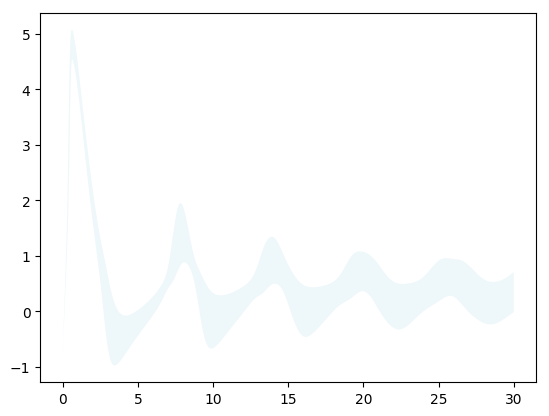

In [0]:
plt.fill_between(x_axis,lower0*0.05+50*0.05,upper0*0.05+50*0.05,facecolor='lightblue',alpha=0.2);

Text(0, 0.5, 'Feature Importance')

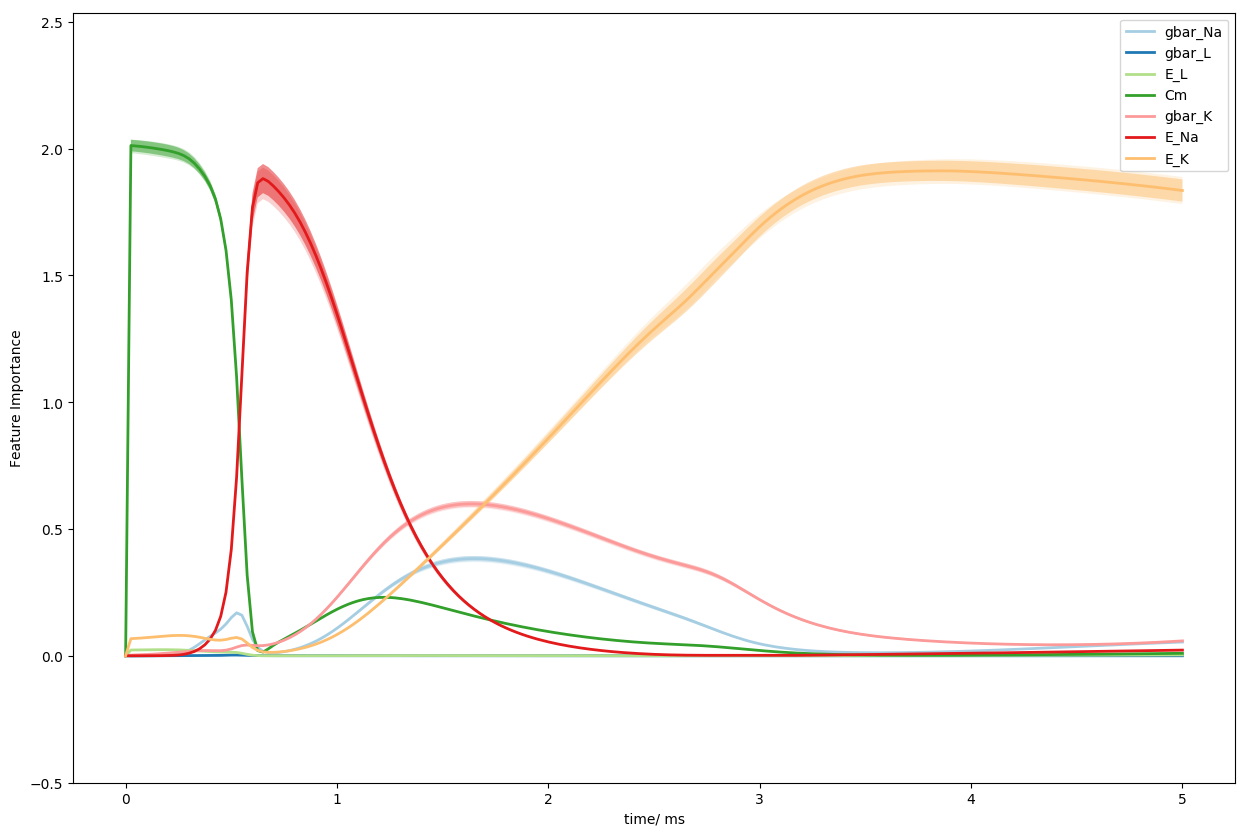

In [0]:

PFI_plotter_same(PFI[:,:,:201],names,ap_times)

plt.xlabel('time/ ms')
plt.ylabel('Feature Importance')
#plt.savefig("drive/My Drive/Figures/HH_PFI_5ms.png")

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



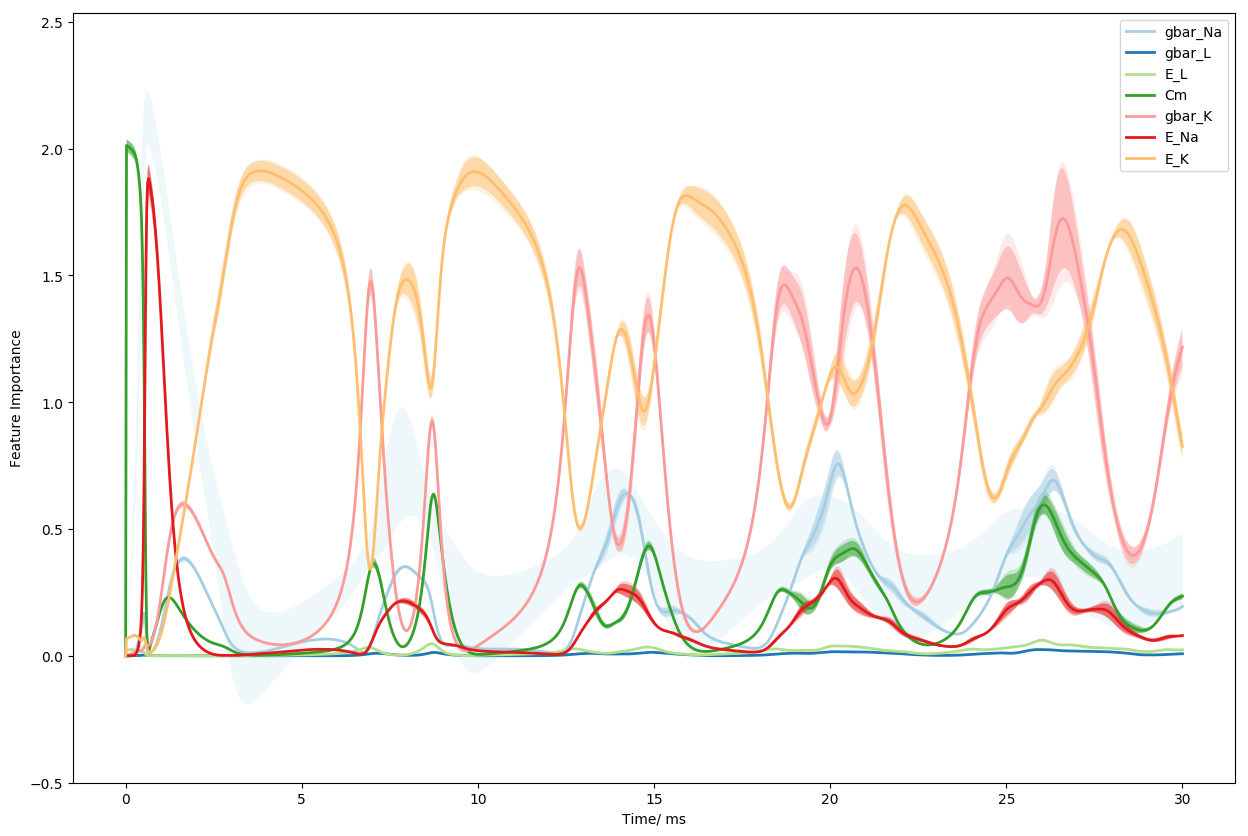

In [0]:
colors = sns.color_palette("Paired", len(names))

fig = plt.figure(figsize=(15,10))

plt.fill_between(x_axis,lower0*0.02+60*0.02,upper0*0.02+60*0.02,facecolor='lightblue',alpha=0.2);


ax = fig.add_subplot(111)
ax.set_prop_cycle('color', colors)

x_array = [f*0.025 for f in range(PFI.shape[2])]
#plt.hist(first_aptime, weights=np.ones_like(first_aptime),bins=60,alpha=0.3)
#plt.hist(second_aptime, weights=np.ones_like(second_aptime),bins=60,alpha=0.3)
#plt.hist(third_aptime, weights=np.ones_like(third_aptime),bins=60,alpha=0.3)


for i in range(PFI.shape[1]):

  color = next(ax._get_lines.prop_cycler)['color']


  # Calculate min and max values of PFI for each variable
  sen_max = np.max(PFI[:,i,:],axis=0)
  sen_min = np.min(PFI[:,i,:],axis=0)
  plt.fill_between(x_array,sen_max,sen_min,facecolor=color,alpha=0.2) ;



  # Calculate mean and std values of PFI for each variable
  mu = np.mean(PFI[:,i,:],axis=0)
  std = np.std(PFI[:,i,:],axis=0)

  upper = mu+std
  lower = mu-std

  plt.fill_between(x_array,lower,upper,facecolor=color,alpha=0.5);

  
  plt.plot(x_array,mu,c=color,linewidth=2,label=names[i]);
  plt.ylim((np.min(PFI)-0.5,np.max(PFI)+0.5))
  plt.ylabel('Feature Importance')
  plt.xlabel('Time/ ms')
  





  plt.legend()
#plt.savefig("drive/My Drive/Figures/HH_PFI2.png")

In [0]:
from copy import copy
foopfi = copy(PFI)

In [0]:
PFI = PFI[:,:,:201]

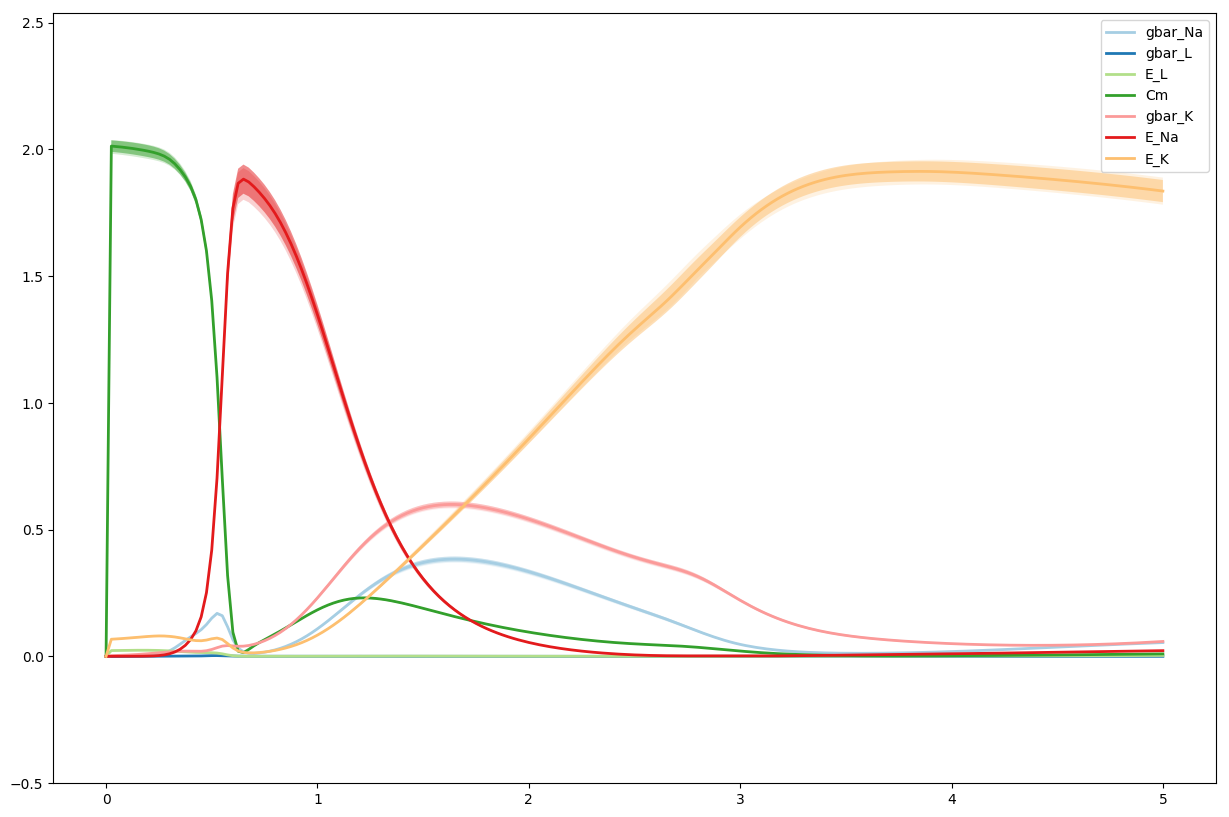

In [0]:
PFI_plotter_same(PFI,names,ap_times)